In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.tree import export_graphviz

## Sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours, NearMiss, RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek

import pydot

from collections import Counter
from pprint import pprint

<br>

### Reading in & Formatting Data

In [25]:
df_ToU_grouped_raw = pd.read_csv('data/df_ToU_grouped.csv')
df_ToU_grouped_raw.head(10)

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen,quartile
0,0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,...,0,0,0,1,0,0,1,0,0,3
1,1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,...,0,0,0,1,0,0,0,0,1,2
2,2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,...,0,0,0,0,0,0,0,1,0,1
3,3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,...,0,0,0,1,0,0,0,1,0,4
4,4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,...,0,1,0,0,0,0,0,1,0,1
5,6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,...,1,0,0,0,0,0,1,0,0,1
6,7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,...,0,0,0,1,0,0,0,0,1,1
7,8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,...,1,0,0,0,0,0,0,0,1,3
8,9,1.095656,0.272893,1.146281,0.262165,0.063917,0.126243,0.001990,0.145793,0.002621,...,1,0,0,0,0,0,0,0,0,1
9,13,0.683975,0.112983,0.720461,0.121282,0.042325,0.056805,0.000142,0.056690,0.000134,...,0,1,0,0,0,0,1,0,0,3


In [26]:
binary_high_quartile = df_ToU_grouped_raw.quartile.map({1:0, 2:0, 3:0, 4:1})
df_ToU_grouped = (df_ToU_grouped_raw.copy()
                 .drop(columns='quartile')
                 .assign(high_response=binary_high_quartile))

df_ToU_grouped.head(10)

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,pt_terraced,pt_terraced_mid,pt_in_commercial,pt_purpose_built_block_tenemant,pt_converted_house_building,sml_hallway,sml_dont_know,sml_living_rm,sml_kitchen,high_response
0,0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,...,0,0,0,1,0,0,1,0,0,0
1,1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,...,0,0,0,1,0,0,0,0,1,0
2,2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,...,0,0,0,0,0,0,0,1,0,0
3,3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,...,0,0,0,1,0,0,0,1,0,1
4,4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,...,0,1,0,0,0,0,0,1,0,0
5,6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,...,1,0,0,0,0,0,1,0,0,0
6,7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,...,0,0,0,1,0,0,0,0,1,0
7,8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,...,1,0,0,0,0,0,0,0,1,0
8,9,1.095656,0.272893,1.146281,0.262165,0.063917,0.126243,0.001990,0.145793,0.002621,...,1,0,0,0,0,0,0,0,0,0
9,13,0.683975,0.112983,0.720461,0.121282,0.042325,0.056805,0.000142,0.056690,0.000134,...,0,1,0,0,0,0,1,0,0,0


In [27]:
df_var_norm_clustered = pd.read_csv('data/df_ToU_var_norm_clustered.csv').drop(columns='Unnamed: 0')
df_mean_norm_clustered = pd.read_csv('data/df_ToU_mean_norm_clustered.csv').drop(columns='Unnamed: 0')
df_var_norm_clustered.head(10)

,SP_10_norm_var,SP_11_norm_var,SP_12_norm_var,SP_13_norm_var,SP_14_norm_var,SP_15_norm_var,SP_16_norm_var,SP_17_norm_var,SP_18_norm_var,SP_19_norm_var,...,SP_47_norm_var,SP_48_norm_var,SP_4_norm_var,SP_5_norm_var,SP_6_norm_var,SP_7_norm_var,SP_8_norm_var,SP_9_norm_var,SP_cluster_norm_var,id
0,0.019958,0.015230,0.042052,0.111678,0.064302,0.442248,0.955056,1.516714,2.739213,2.875793,...,0.865374,0.724495,0.130568,0.160494,0.061328,0.094711,0.082614,0.054892,1,140
1,0.001300,0.001176,0.007722,0.041392,0.267401,0.587869,1.197158,1.544946,1.919685,1.971440,...,0.861643,0.831535,0.052202,0.003583,0.001590,0.001514,0.001338,0.001230,3,969
2,0.480971,0.102472,0.054693,0.074898,0.101195,0.191156,0.448635,0.622290,0.929413,0.989643,...,1.424833,1.277829,0.434495,0.292975,0.095418,0.149539,0.102196,0.105499,0,323
3,0.302754,0.293984,0.325484,0.341024,0.349478,0.275322,0.354732,0.407858,0.811331,0.596400,...,2.324698,2.333603,1.272309,0.736537,0.560964,0.498227,0.335848,0.316536,0,144
4,0.420707,0.348624,0.219269,0.499197,0.779261,1.278653,2.107574,1.751640,1.718799,1.985543,...,0.043128,0.028037,0.402429,0.102276,0.051175,0.010617,0.023339,0.065637,2,656
5,0.030014,0.697898,0.389317,0.998357,1.079248,1.886586,1.429411,2.554478,1.922482,2.046012,...,0.082458,0.049477,0.031199,0.028051,0.030442,0.027848,0.028811,0.030438,1,186
6,0.045109,0.034559,0.020538,0.048135,0.106874,0.260979,0.375166,0.480174,0.775591,0.861988,...,0.976340,0.730126,0.157784,0.152591,0.172966,0.124294,0.045434,0.030919,3,847
7,1.123387,0.863476,1.941058,2.736715,0.883499,0.306195,0.195779,0.568292,1.155599,0.885479,...,0.701701,0.603274,0.028969,0.026354,0.024812,0.024327,0.073433,0.210532,3,423
8,0.424096,0.413454,0.384152,0.368823,0.380481,0.744804,0.829874,0.767093,0.822010,0.910297,...,1.147002,0.956516,0.149737,0.163691,0.132030,0.118391,0.242363,0.307421,0,143
9,0.020217,0.031124,0.168850,0.201122,0.440306,0.955371,0.385591,0.744659,0.736714,0.806703,...,0.782069,0.785922,0.362495,0.162039,0.183238,0.063203,0.067247,0.022560,2,693


In [28]:
df_ToU_grouped = df_ToU_grouped.merge(df_var_norm_clustered, on='id', how='inner')
df_ToU_grouped = df_ToU_grouped.merge(df_mean_norm_clustered, on='id', how='inner')
df_ToU_grouped = df_ToU_grouped.rename(columns={'SP_cluster_norm_var':'var_cluster', 'SP_cluster_norm_mean':'mean_cluster'})
df_ToU_grouped.head(10)

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,SP_46_norm_mean,SP_47_norm_mean,SP_48_norm_mean,SP_4_norm_mean,SP_5_norm_mean,SP_6_norm_mean,SP_7_norm_mean,SP_8_norm_mean,SP_9_norm_mean,mean_cluster
0,0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,...,1.218073,0.979448,0.751953,0.459242,0.466256,0.414829,0.411309,0.494550,0.579167,0
1,1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,...,1.688102,1.372207,1.076808,0.574858,0.525803,0.508848,0.509465,0.478021,0.462144,0
2,2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,...,0.734058,0.585575,0.479531,0.359640,0.354085,0.352863,0.350561,0.347155,0.349147,1
3,3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,...,0.429703,0.396309,0.376232,0.365212,0.363111,0.362405,0.363459,0.373700,0.928373,2
4,4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,...,0.979618,0.759654,0.580148,0.258679,0.211304,0.207670,0.186672,0.174451,0.184407,0
5,6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,...,1.177449,0.941634,0.713174,0.321257,0.244123,0.210846,0.209489,0.206418,0.187994,1
6,7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,...,0.958400,0.907917,0.822810,0.555721,0.512893,0.482671,0.473083,0.466554,0.560443,3
7,8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,...,1.441349,1.370023,1.375730,0.742499,0.650635,0.575806,0.536337,0.541406,0.565129,3
8,9,1.095656,0.272893,1.146281,0.262165,0.063917,0.126243,0.001990,0.145793,0.002621,...,1.084054,0.960982,0.873187,0.623047,0.599274,0.544177,0.538481,0.536672,0.618965,2
9,13,0.683975,0.112983,0.720461,0.121282,0.042325,0.056805,0.000142,0.056690,0.000134,...,0.743623,0.613826,0.540368,0.438231,0.452636,0.450202,0.450343,0.455890,0.442532,1


<br>
### Basic Classification EDA

In [ ]:
heat_solid        1.33333
12          heat_nocentralheat        1.04965
14       hwater_hwater_elecimm        1.03704
16       drop_day_combined_var

Text(0.5,1,'Mean Clusters')

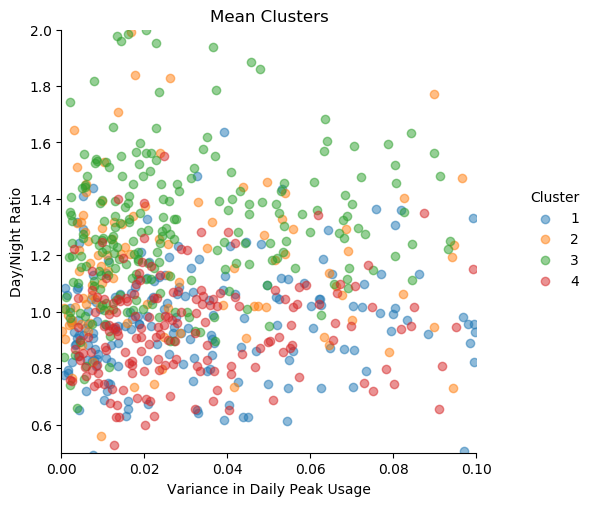

In [89]:
mpl.rcParams.update(mpl.rcParamsDefault)

clstr_plot = sns.lmplot(x='drop_weekend_combined_var', y='day/night', data=df_ToU_grouped,
                        hue='var_cluster', fit_reg=False, scatter_kws={'alpha':0.5}, legend=False)
plt.xlim(0, 0.1)
plt.ylim(0.5, 2)
plt.legend(loc=2, bbox_to_anchor=(1.1, 0.65), title='Cluster', labels=['1', '2', '3', '4'], frameon=False, facecolor='white', edgecolor='white')
plt.ylabel('Day/Night Ratio')
plt.xlabel('Variance in Daily Peak Usage')
plt.title('Mean Clusters')

In [30]:
df_ToU_grouped.head(10)

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,SP_46_norm_mean,SP_47_norm_mean,SP_48_norm_mean,SP_4_norm_mean,SP_5_norm_mean,SP_6_norm_mean,SP_7_norm_mean,SP_8_norm_mean,SP_9_norm_mean,mean_cluster
0,0,0.547429,0.071353,0.556205,0.070767,0.030682,0.083659,0.005393,0.070262,0.003501,...,1.218073,0.979448,0.751953,0.459242,0.466256,0.414829,0.411309,0.494550,0.579167,0
1,1,0.334397,0.021818,0.329813,0.021258,0.023734,0.048902,0.000389,0.047346,0.000422,...,1.688102,1.372207,1.076808,0.574858,0.525803,0.508848,0.509465,0.478021,0.462144,0
2,2,1.517571,0.538666,1.707918,0.695569,0.109754,0.158029,0.005620,0.153047,0.003230,...,0.734058,0.585575,0.479531,0.359640,0.354085,0.352863,0.350561,0.347155,0.349147,1
3,3,1.617122,0.024445,1.625056,0.017950,0.063637,0.484150,0.378307,0.849179,0.442186,...,0.429703,0.396309,0.376232,0.365212,0.363111,0.362405,0.363459,0.373700,0.928373,2
4,4,0.634793,0.017399,0.639006,0.015458,0.015368,0.026392,0.000285,0.048804,0.003182,...,0.979618,0.759654,0.580148,0.258679,0.211304,0.207670,0.186672,0.174451,0.184407,0
5,6,1.091562,0.104647,1.102008,0.122810,0.028629,0.050609,0.005622,0.050826,0.002464,...,1.177449,0.941634,0.713174,0.321257,0.244123,0.210846,0.209489,0.206418,0.187994,1
6,7,0.864982,0.443054,0.775204,0.379335,0.058878,0.129837,0.005511,0.132389,0.003971,...,0.958400,0.907917,0.822810,0.555721,0.512893,0.482671,0.473083,0.466554,0.560443,3
7,8,0.407515,0.045317,0.422854,0.045390,0.043719,0.072690,0.000680,0.071845,0.000584,...,1.441349,1.370023,1.375730,0.742499,0.650635,0.575806,0.536337,0.541406,0.565129,3
8,9,1.095656,0.272893,1.146281,0.262165,0.063917,0.126243,0.001990,0.145793,0.002621,...,1.084054,0.960982,0.873187,0.623047,0.599274,0.544177,0.538481,0.536672,0.618965,2
9,13,0.683975,0.112983,0.720461,0.121282,0.042325,0.056805,0.000142,0.056690,0.000134,...,0.743623,0.613826,0.540368,0.438231,0.452636,0.450202,0.450343,0.455890,0.442532,1


In [31]:
mean_groupby_response = df_ToU_grouped.groupby('mean_cluster').high_response
var_groupby_response = df_ToU_grouped.groupby('var_cluster').high_response

print('Percentage of high response households in each cluster')
print('')
print(100*mean_groupby_response.sum()/mean_groupby_response.count())
print('')
print(100*var_groupby_response.sum()/var_groupby_response.count())

Percentage of high response households in each cluster

mean_cluster
0    23.076923
1    27.317073
2    27.642276
3    23.346304
Name: high_response, dtype: float64

var_cluster
0    26.388889
1    23.387097
2    27.799228
3    20.441989
Name: high_response, dtype: float64


In [32]:
## Add PCA variables and look at cluster differences across them

In [33]:
groupby_high_response = df_ToU_grouped.groupby('high_response').mean()
groupby_high_response = (groupby_high_response
                         .reset_index(drop=True)
                         .append(pd.DataFrame(df_ToU_grouped.mean())
                                 .T
                                 .drop(columns='high_response'))
                         .reset_index(drop=True)
                        )
groupby_high_response.index = ['low_response', 'high_response', 'average']
groupby_high_response

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,SP_46_norm_mean,SP_47_norm_mean,SP_48_norm_mean,SP_4_norm_mean,SP_5_norm_mean,SP_6_norm_mean,SP_7_norm_mean,SP_8_norm_mean,SP_9_norm_mean,mean_cluster
low_response,518.529915,0.707266,0.125275,0.715401,0.131762,0.051490,0.090063,0.005661,0.094783,0.007468,...,1.191875,1.046126,0.903801,0.562882,0.529993,0.516400,0.506779,0.498658,0.497836,1.569231
high_response,508.133333,1.083463,0.238607,1.097198,0.246922,0.074977,0.136291,0.018697,0.142870,0.020723,...,1.190479,1.040608,0.893402,0.520205,0.495242,0.481423,0.467340,0.476473,0.471607,1.558974
average,515.930769,0.801315,0.153608,0.810850,0.160552,0.057362,0.101620,0.008920,0.106804,0.010782,...,1.191526,1.044747,0.901201,0.552212,0.521306,0.507655,0.496919,0.493111,0.491279,1.566667


In [34]:
col_names = []
normalised_response_delta_list = []

for col in groupby_high_response.columns:
    col_names.append(col)
    
    low_response = groupby_high_response.loc['low_response', col]
    high_response = groupby_high_response.loc['high_response', col]
    average = groupby_high_response.loc['average', col]
    
    normalised_response_delta = np.abs((low_response/average) - (high_response/average))
    normalised_response_delta_list.append(normalised_response_delta)
    
df_response_deltas = (pd.DataFrame([col_names, normalised_response_delta_list])
                      .T
                      .rename(columns={0:'col_name', 1:'response_delta'})
                      .sort_values('response_delta', ascending=False)
                      .reset_index(drop=True)
                     )

SP_cols = df_response_deltas.col_name.str[:2]=='SP'
print(df_response_deltas[~SP_cols].head(15))
print('')
print(df_response_deltas[SP_cols].head(15))

                      col_name response_delta
2                heat_dontknow        1.33333
3                   heat_solid        1.33333
12          heat_nocentralheat        1.04965
14       hwater_hwater_elecimm        1.03704
16       drop_day_combined_var          1.023
24   drop_weekday_combined_var       0.997384
26   drop_weekend_combined_var       0.991389
28                         var       0.990974
41             hwater_communal       0.952381
42     drop_night_combined_var        0.94461
58  n_Portable_electric_heater       0.853081
60                   heat_elec       0.843537
61                    heat_oil            0.8
62                 pt_detached            0.8
63              n_Tumble_dryer       0.781997

     col_name response_delta
0   SP_10_var        1.46151
1    SP_8_var        1.33812
4    SP_9_var        1.31126
5   SP_11_var        1.22936
6   SP_15_var        1.15318
7   SP_12_var        1.13351
8    SP_7_var        1.12675
9    SP_5_var        1.09039
10

C:\Users\ABour\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [35]:
groupby_clusters = df_ToU_grouped.groupby('mean_cluster').mean()
groupby_clusters = (groupby_clusters
                    .reset_index(drop=True)
                    .append(pd.DataFrame(df_ToU_grouped.mean())
                    .T
                    .drop(columns='mean_cluster'))
                    .reset_index(drop=True)
                     )
groupby_clusters.index = [1, 2, 3, 4, 'average']
groupby_clusters

,id,DoY_drop_weekend_max_combined_mean,DoY_drop_weekend_max_combined_var,DoY_max_combined_mean,DoY_max_combined_var,DoY_min_combined_mean,SP_10_mean,SP_10_var,SP_11_mean,SP_11_var,...,SP_45_norm_mean,SP_46_norm_mean,SP_47_norm_mean,SP_48_norm_mean,SP_4_norm_mean,SP_5_norm_mean,SP_6_norm_mean,SP_7_norm_mean,SP_8_norm_mean,SP_9_norm_mean
1,537.353846,0.800187,0.161772,0.811407,0.166738,0.042836,0.076803,0.003361,0.080007,0.003809,...,1.643631,1.469496,1.248290,1.010527,0.480433,0.445796,0.426085,0.413705,0.409675,0.409272
2,535.341463,0.865764,0.160991,0.877322,0.169127,0.048165,0.084453,0.004542,0.092533,0.007728,...,1.078007,0.942266,0.787552,0.657776,0.418369,0.400316,0.390337,0.382685,0.386987,0.389617
3,480.707317,0.884035,0.179907,0.888807,0.187975,0.050968,0.107077,0.017139,0.123678,0.024848,...,1.036141,0.941611,0.808835,0.697804,0.483061,0.463924,0.478768,0.510024,0.500027,0.520993
4,501.050584,0.711173,0.128938,0.720095,0.135893,0.078779,0.131531,0.012696,0.130445,0.011777,...,1.350193,1.299051,1.208370,1.109769,0.746534,0.702571,0.676953,0.644907,0.637761,0.620373
average,515.930769,0.801315,0.153608,0.810850,0.160552,0.057362,0.101620,0.008920,0.106804,0.010782,...,1.302493,1.191526,1.044747,0.901201,0.552212,0.521306,0.507655,0.496919,0.493111,0.491279


In [36]:
col_names = []
normalised_cluster_delta_list = []

for col in groupby_clusters.columns:
    col_names.append(col)
    
    cluster_1 = groupby_clusters.loc[1, col]
    cluster_2 = groupby_clusters.loc[2, col]
    cluster_3 = groupby_clusters.loc[3, col]
    cluster_4 = groupby_clusters.loc[4, col]
    
    average = groupby_clusters.loc['average', col]
    
    normalised_cluster_delta = np.abs((cluster_1/average)) + np.abs((cluster_2/average)) + np.abs((cluster_3/average)) + np.abs((cluster_4/average))
    normalised_cluster_delta_list.append(normalised_cluster_delta)
    
df_cluster_deltas = (pd.DataFrame([col_names, normalised_cluster_delta_list])
                      .T
                      .rename(columns={0:'col_name', 1:'cluster_delta'})
                      .sort_values('cluster_delta', ascending=False)
                      .reset_index(drop=True)
                     )

SP_cols = df_cluster_deltas.col_name.str[:2]=='SP'
print(df_cluster_deltas[~SP_cols].head(15))
print('')
print(df_cluster_deltas[SP_cols].head(15))

                              col_name cluster_delta
18                              a_75ov       4.31901
20                    pt_in_commercial       4.27095
21                  heat_nocentralheat       4.26999
24                            heat_oil       4.23627
28               hwater_hwater_elecimm       4.22061
31                   n_Electric_shower       4.20653
43   DoY_drop_weekend_max_combined_var       4.11181
44                DoY_max_combined_var       4.10916
45             drop_night_combined_var       4.10561
50                    n_Standby_savers       4.08024
52  DoY_drop_weekend_max_combined_mean       4.06976
54               DoY_max_combined_mean       4.06688
55                   n_Freeview_TV_box       4.06483
56           drop_weekend_combined_var       4.06419
57                                 var       4.06361

          col_name cluster_delta
0        SP_14_var       4.76848
1        SP_16_var        4.7236
2        SP_13_var       4.70776
3        SP_15_var 

C:\Users\ABour\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


<br>

### ML Model Data Preparation

In [60]:
## Disaggregated Feature Names
generated_non_SP_features = ['DoY_drop_weekend_max_combined_mean', 'DoY_drop_weekend_max_combined_var', 'DoY_max_combined_mean', 'DoY_max_combined_var', 'DoY_min_combined_mean', 'SP_var_combined_mean', 'drop_day_combined_mean', 'drop_day_combined_var', 'drop_night_combined_mean', 'drop_night_combined_var', 'drop_not_lunch_combined_mean', 'drop_weekday_combined_mean', 'drop_weekday_combined_var', 'drop_weekend_combined_mean', 'drop_weekend_combined_var', 'max', 'mean', 'min', 'var', 'day/night']
survey_features = ['Q234', 'n_Electric_hob', 'n_Gas_hob', 'n_Electric_oven', 'n_Microwave', 'n_Washing_machine_no_dryer', 'n_Tumble_dryer', 'n_Washer-dryer', 'n_Dishwasher', 'n_Electric_shower', 'n_Over-sink_electric_water_heater', 'n_Portable_electric_heater', 'n_Television', 'n_Desktop_PC', 'n_Laptop', 'n_Printer', 'n_Router', 'n_Dvdplayer', 'n_Cable_TV_box', 'n_Satellite_TV_box', 'n_Freeview_TV_box', 'n_Games_console', 'n_Standby_savers', 'Q328', 'Q330', 'Q332', 'Q333', 'Q334', 'Q339', 'Q340', 'Q341', 'n_fem', 'n_mal', 'a_04', 'a_0511', 'a_1215', 'a_1617', 'a_1824', 'a_2534', 'a_3544', 'a_4554', 'a_5564', 'a_6574', 'a_75ov', 'n_child', 'n_adult', 'heat_gas', 'heat_elec', 'heat_nocentralheat', 'heat_solid', 'heat_other', 'heat_dontknow', 'heat_oil', 'hwater_gasboiler', 'hwater_hwater_elecimm', 'hwater_communal', 'lights_trad_halogen', 'lights_le_led_cfl', 'fridge_freezer', 'household_size', 'n_rooms', 'n_bedrooms', 'pt_detached', 'pt_Semi_detached', 'pt_terraced', 'pt_terraced_mid', 'pt_in_commercial', 'pt_purpose_built_block_tenemant', 'pt_converted_house_building', 'sml_hallway', 'sml_dont_know', 'sml_living_rm', 'sml_kitchen']
generated_mean_SP_features = [f'SP_{x}_mean' for x in range(1, 49)]
generated_norm_mean_SP_features = [f'SP_{x}_norm_mean' for x in range(1, 49)]
generated_var_SP_features = [f'SP_{x}_var' for x in range(1, 49)]
generated_norm_var_SP_features = [f'SP_{x}_norm_var' for x in range(1, 49)]
cluster_features = ['var_cluster', 'mean_cluster']

In [38]:
## Setting target variable
y_col = 'high_response'
X_cols = list(df_ToU_grouped.drop(columns=[y_col, 'id']).columns)
X_cols[:10]

['DoY_drop_weekend_max_combined_mean',
 'DoY_drop_weekend_max_combined_var',
 'DoY_max_combined_mean',
 'DoY_max_combined_var',
 'DoY_min_combined_mean',
 'SP_10_mean',
 'SP_10_var',
 'SP_11_mean',
 'SP_11_var',
 'SP_12_mean']

In [39]:
def format_data_4_ML(df_ToU, y_col, X_cols, print_arr_sizes=True):
    ## Converting features and target to arrays
    y = np.array(df_ToU[y_col])#.reshape(-1, 1)
    X = np.array(df_ToU[X_cols])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

    ## Scaling the features
    x_scaler = preprocessing.StandardScaler().fit(X_test)
    X_test = x_scaler.transform(X_test)
    X_train = x_scaler.transform(X_train)

    ## Printing array sizes
    if print_arr_sizes == True:
        print('')
        print('Training Features Shape:', X_train.shape)
        print('Training Labels Shape:', y_train.shape)
        print('Testing Features Shape:', X_test.shape)
        print('Testing Labels Shape:', y_test.shape)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = format_data_4_ML(df_ToU_grouped, y_col, X_cols)


Training Features Shape: (741, 287)
Training Labels Shape: (741,)
Testing Features Shape: (39, 287)
Testing Labels Shape: (39,)


<br>

### Resampling

In [40]:
class Sampler(object):
    """
    This is an object that wraps the imblearn module to ease the sampling process
    """
    
    ## ~~~~~~~~~~~~ Core Functions ~~~~~~~~~~~~
    
    def select_sample_method(self, ratio=1):
        sampling_methods_dict = {
            ## Over Sampling
            'random_oversampler' : RandomOverSampler(ratio=ratio),
            'SMOTE' : SMOTE(ratio=ratio),

            ## Under Sampling
            'condensed_nearest_neighbour' : CondensedNearestNeighbour(ratio=ratio),
            'edited_nearest_neighbours' : EditedNearestNeighbours(ratio=ratio),
            'nm1' :  NearMiss(version=1, ratio=ratio),
            'nm2' : NearMiss(version=2, ratio=ratio),
            'nm3' : NearMiss(version=3, ratio=ratio),
            'random_undersampler' : RandomUnderSampler(ratio=ratio),
            'tomek_links' : TomekLinks(ratio=ratio),
            
            ## Combination
            'SMOTE_ENN' : SMOTEENN(ratio=ratio),
            'SMOTE_tomek' : SMOTETomek(ratio=ratio),
        }

        return sampling_methods_dict[self.method]
    
    def sample(self, X, y, **kwargs):
        sample_method = self.select_sample_method(**kwargs)
        return sample_method.fit_resample(X, y)
    
    
    ## ~~~~~~~~~~~~ Helper Functions ~~~~~~~~~~~~
    
    def print_sampling_transform(self, y, y_resampled):
        orig_target_dist_count = sorted(Counter(y).items())
        sampled_target_dist_count = sorted(Counter(y_resampled).items())
        
        print(f'Sampling method: {self.method}')
        
        print('Original Distributions')
        print(f'Low Response: {orig_target_dist_count[0][1]}')
        print(f'High Response: {orig_target_dist_count[1][1]}')

        print('')
        print('Sampled Distributions')
        print(f'Low Response: {sampled_target_dist_count[0][1]}')
        print(f'High Response: {sampled_target_dist_count[1][1]}')
        
    
    ## ~~~~~~~~~~~~ Initializer ~~~~~~~~~~~~
    
    def __init__(self, method):
        self.method = method

def sample_data(method, X, y, ratio=1, print_transform=False):
    ## *** Look into Including this function as part of the Sampler initialisation ***
    
    ## Escape if method set to None
    if method == None:
        return X, y
    
    ## Setting model and taking sample
    sampler = Sampler(method) # Initialising the sampler
    if ratio != None:
        X_resampled, y_resampled = sampler.sample(X, y, ratio=ratio) # Running the 
    else:
        X_resampled, y_resampled = sampler.sample(X, y) # Running the 
    
    ## Printing the sampling transformation 
    if print_transform == True:
        sampler.print_sampling_transform(y, y_resampled) 
        
    return X_resampled, y_resampled
    
## Test Sampling
X_train_resampled, y_train_resampled = sample_data('SMOTE', X_train, y_train, print_transform=True)

Sampling method: SMOTE
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555


<br>

### Random Forest & General Model Helper Functions

In [41]:
def run_metrics_continuous(test_labels, pred_test_labels, print_results=True, return_results=True):
    # Metrics
    MAE = metrics.mean_absolute_error(test_labels, pred_test_labels)
    MSE = metrics.mean_squared_error(test_labels, pred_test_labels)
    RMSE = np.sqrt(metrics.mean_squared_error(test_labels, pred_test_labels))
    MAPE = np.mean(np.abs((test_labels - pred_test_labels) / test_labels)) * 100
    r2 = metrics.r2_score(test_labels, pred_test_labels)

    # Metric Printout
    if print_results == True:
        print('')
        print(f'Mean Absolute Error: {round(MAE, 4)}')  
        print(f'Mean Squared Error: {round(MSE, 4)}')  
        print(f'Root Mean Squared Error: {round(RMSE, 4)}') 
        print(f'Mean Absolute Percentage Error: {int(MAPE)}')
        print(f'R2 Score: {round(r2, 4)}')
    
    if return_results == True:
        return {'MAE':MAE, 'MSE':MSE, 'RMSE':RMSE, 'MAPE':MAPE, 'r2':r2}
    
def run_metrics_categorical(y_test, y_pred, model_dict):
    print('')
    print('Classification Report:')
    print(metrics.classification_report(y_test, y_pred, target_names=['Low Response', 'High Response']))#, target_names=target_names)

    confusion_matrix_results = metrics.confusion_matrix(y_test, y_pred)
    print('')
    print('Confusion Matrix:')
    print(pd.DataFrame(confusion_matrix_results, index=['True: Low', 'True: High'], columns=['Pred: Low', 'Pred:High']))
    
    report =  metrics.classification_report(y_test, y_pred, target_names=['Low Response', 'High Response'], output_dict=True)
    model_dict[model_name]['results'] = report
    model_dict[model_name]['pred'] = y_pred
    
    return model_dict
    
def create_df_importances(rf, features):
    # Get numerical feature importances
    importances = list(rf.feature_importances_)

    ## Creating dataframe of importances
    df_importances = (pd.DataFrame(data={'importances':importances, 'features':features})
                      .sort_values('importances', ascending=False)
                     )

    return df_importances

def plot_RF_var_importances(df_importances):
    # list of x locations for plotting
    x_values = list(range(len(df_importances.importances)))

    # Make a bar chart
    plt.figure(figsize=(20, 6))
    plt.bar(x_values, df_importances.importances, orientation = 'vertical')
    plt.grid(False)

    # Tick labels for x axis
    plt.xticks(x_values, df_importances.features, rotation='vertical')

    # Axis labels and title
    plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

<br>
### Testing Different Sampling Methods

In [42]:
def model_fit_predict(model, X_train_resampled, y_train_resampled, X_test):
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    return y_pred

def LR_model(X_train, X_test, y_train, sampler, model_name, model_dict=None, C=1):
    ## Sampling
    X_train_resampled, y_train_resampled = sample_data(sampler, X_train, y_train, print_transform=True)

    ## Defining and fitting model
    model = LogisticRegression(penalty='l2', random_state=42, C=C)
    y_pred = model_fit_predict(model, X_train_resampled, y_train_resampled, X_test)

    ## Running metrics for model
    if isinstance(model_dict, dict):
        
        model_dict[model_name] = dict()
        model_dict = run_metrics_categorical(y_test, y_pred, model_dict)
        
        return model_dict   

def RF_model(X_train, X_test, y_train, sampler, model_name, model_dict=None, n_estimators=1000, return_model=False):
    return_list = []
    
    ## Sampling
    X_train_resampled, y_train_resampled = sample_data(sampler, X_train, y_train, print_transform=True)

    ## Defining and fitting model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state = 42)
    y_pred = model_fit_predict(model, X_train_resampled, y_train_resampled, X_test)

    ## Running metrics for model
    if isinstance(model_dict, dict):
        
        model_dict[model_name] = dict()
        model_dict = run_metrics_categorical(y_test, y_pred, model_dict)
        return_list.append(model_dict)
    
    ## Adding return values
    if return_model == True:
        return_list.append(model)
        
    if len(return_list) == 1:
        return return_list[0]
    
    else:
        return return_list    

def SVM_model(X_train, X_test, y_train, sampler, model_name, model_dict=None, kernel='rbf'):
    ## Sampling
    X_train_resampled, y_train_resampled = sample_data(sampler, X_train, y_train, print_transform=True)

    ## Defining and fitting model
    model = svm.SVC(kernel=kernel, random_state=42)
    y_pred = model_fit_predict(model, X_train_resampled, y_train_resampled, X_test)

    ## Running metrics for model
    if isinstance(model_dict, dict):
        
        model_dict[model_name] = dict()
        model_dict = run_metrics_categorical(y_test, y_pred, model_dict)
        
        return model_dict    
    
model_dict = dict()
samplers = ['random_oversampler', 'SMOTE', 'nm1', 'nm2', 'nm3', 'random_undersampler', 'SMOTE_ENN']

In [43]:
for sampler in samplers:
    model_name = f'LR - {sampler}'
    model_dict = LR_model(X_train, X_test, y_train, sampler, model_name, model_dict=model_dict)
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')

Sampling method: random_oversampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.77      0.57      0.65        30
High Response       0.24      0.44      0.31         9

    micro avg       0.54      0.54      0.54        39
    macro avg       0.50      0.51      0.48        39
 weighted avg       0.65      0.54      0.57        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          17         13
True: High          5          4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: SMOTE
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.77      0.57      0.65        30
High Response       0.24      0.44      0.31         9

    micro avg       0.54      0.54      0.54        39
    macro avg       0.50      0.51      0.48        39
 weighted avg       0.65      0.54      0.57        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          17         13
True: High          5          4

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: nm1
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.82      0.60      0.69        30
High Response       0.29      0.56      0.38         9

    micro avg       0.59      0.59      0.59        39
    macro avg       0.56      0.58      0.54        39
 weighted avg       0.70      

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sampling method: nm2
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.78      0.47      0.58        30
High Response       0.24      0.56      0.33         9

    micro avg       0.49      0.49      0.49        39
    macro avg       0.51      0.51      0.46        39
 weighted avg       0.65      0.49      0.53        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          14         16
True: High          4          5

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: nm3
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.84      0.53      0.65        30
High Response       0.30      0.67      0.41         9


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Sampling method: SMOTE_ENN
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 107
High Response: 492

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.84      0.53      0.65        30
High Response       0.30      0.67      0.41         9

    micro avg       0.56      0.56      0.56        39
    macro avg       0.57      0.60      0.53        39
 weighted avg       0.72      0.56      0.60        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          16         14
True: High          3          6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
for sampler in samplers:
    model_name = f'RF - {sampler}'
    model_dict = RF_model(X_train, X_test, y_train, sampler, model_name, model_dict=model_dict)
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')

Sampling method: random_oversampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.82      0.90      0.86        30
High Response       0.50      0.33      0.40         9

    micro avg       0.77      0.77      0.77        39
    macro avg       0.66      0.62      0.63        39
 weighted avg       0.74      0.77      0.75        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          27          3
True: High          6          3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: SMOTE
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.81      0.87      0.84        30
High Response       0.43      0.33    

In [45]:
for sampler in samplers:
    model_name = f'SVM - {sampler}'
    model_dict = SVM_model(X_train, X_test, y_train, sampler, model_name, model_dict=model_dict)
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')

Sampling method: random_oversampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.79      0.73      0.76        30
High Response       0.27      0.33      0.30         9

    micro avg       0.64      0.64      0.64        39
    macro avg       0.53      0.53      0.53        39
 weighted avg       0.67      0.64      0.65        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          22          8
True: High          6          3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: SMOTE
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 555
High Response: 555


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.78      0.70      0.74        30
High Response       0.25      0.33      0.29         9

    micro avg       0.62      0.62      0.62        39
    macro avg       0.51      0.52      0.51        39
 weighted avg       0.66      0.62      0.63        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          21          9
True: High          6          3

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: nm1
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.86      0.60      0.71        30
High Response       0.33      0.67      0.44         9

    micro avg       0.62      0.62      0.62        39
    macro avg       0.60      0.63      0.58        39
 weighted avg       0.74      

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Sampling method: nm2
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.82      0.47      0.60        30
High Response       0.27      0.67      0.39         9

    micro avg       0.51      0.51      0.51        39
    macro avg       0.55      0.57      0.49        39
 weighted avg       0.70      0.51      0.55        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          14         16
True: High          3          6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: nm3
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.88      0.73      0.80        30
High Response       0.43      0.67      0.52         9


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.95      0.60      0.73        30
High Response       0.40      0.89      0.55         9

    micro avg       0.67      0.67      0.67        39
    macro avg       0.67      0.74      0.64        39
 weighted avg       0.82      0.67      0.69        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          18         12
True: High          1          8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Sampling method: SMOTE_ENN
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 123
High Response: 508

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.90      0.30      0.45        30
High Response       0.28      0.89      0.42         9

    micro avg       0.44      0.44      0.44        39
    macro avg       0.59      0.59      0.44        39
 weighted avg       0.76

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
df_sampling = pd.DataFrame(columns=['Low Response f1 Score', 'High Response f1 Score'])

for model in model_dict.keys():
    results = model_dict[model]['results']
    low_f1 = results['Low Response']['f1-score']
    high_f1 = results['High Response']['f1-score']
    
    df_sampling.at[model, 'Low Response f1 Score'] = low_f1
    df_sampling.at[model, 'High Response f1 Score'] = high_f1
    
RF_idxs = df_sampling.index.str[:2]=='RF' 
LR_idxs = df_sampling.index.str[:2]=='LR'
SVM_idxs = df_sampling.index.str[:3]=='SVM'

df_RF_sampling = df_sampling[RF_idxs]
df_LR_sampling = df_sampling[LR_idxs]
df_SVM_sampling = df_sampling[SVM_idxs]

print(df_RF_sampling.sort_values('High Response f1 Score', ascending=False))
print('')
print(df_LR_sampling.sort_values('High Response f1 Score', ascending=False))
print('')
print(df_SVM_sampling.sort_values('High Response f1 Score', ascending=False))

                         Low Response f1 Score High Response f1 Score
RF - nm1                                  0.76               0.571429
RF - random_undersampler              0.745098               0.518519
RF - SMOTE_ENN                         0.52381               0.444444
RF - nm3                              0.763636               0.434783
RF - random_oversampler               0.857143                    0.4
RF - SMOTE                             0.83871                  0.375
RF - nm2                                   0.5               0.352941

                         Low Response f1 Score High Response f1 Score
LR - nm3                              0.653061               0.413793
LR - SMOTE_ENN                        0.653061               0.413793
LR - nm1                              0.692308               0.384615
LR - nm2                              0.583333               0.333333
LR - random_oversampler               0.653846               0.307692
LR - SMOTE         

<br>
### Investigating Feature Selection for RF Model

In [72]:
"""
Feature List Names:

generated_non_SP_features
survey_features
generated_mean_SP_features
generated_norm_mean_SP_features
generated_var_SP_features
generated_norm_var_SP_features
cluster_features

Use each of the feature lists individually through a RF, take the top 10 most important and combine together.
If the clusters aren't converted into binary variables then they will likely only be used for splitting further down the tree.

"""

## Checking no columns are omitted in groupings
set(df_ToU_grouped.columns) - set(generated_non_SP_features+survey_features+generated_mean_SP_features+
                                  generated_norm_mean_SP_features+generated_var_SP_features+generated_norm_var_SP_features+
                                  cluster_features)

model_dict = dict()
feature_variations = {'generated_non_SPs':generated_non_SP_features, 
                      'survey_features':survey_features,
                      'generated_norm_mean_SPs':generated_norm_mean_SP_features, 
                      'generated_norm_var_SPs':generated_norm_var_SP_features,
                      'generated_var_SPs':generated_var_SP_features,
                      'generated_mean_SPs':generated_mean_SP_features,
                      'clusters':cluster_features,
                      'var_SP_and_survey':survey_features+generated_var_SP_features,
                      'var_SP_and_survey_clusters':survey_features+generated_var_SP_features+cluster_features,
                      'mean_SP_and_survey':survey_features+generated_var_SP_features,
                      'mean_SP_and_survey_clusters':survey_features+generated_mean_SP_features+cluster_features,
                     }

In [73]:
for feature_variation in feature_variations.keys():
    features = feature_variations[feature_variation]
    
    ## Setting target variable
    y_col = 'high_response'
    X_cols = features
    
    ## Running Model
    X_train, X_test, y_train, y_test = format_data_4_ML(df_ToU_grouped, y_col, X_cols)
    model_name = f'RF - {feature_variation}'
    model_dict = RF_model(X_train, X_test, y_train, 'random_undersampler', model_name, model_dict=model_dict)
    
    ## Print add-on
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')


Training Features Shape: (741, 20)
Training Labels Shape: (741,)
Testing Features Shape: (39, 20)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.84      0.53      0.65        30
High Response       0.30      0.67      0.41         9

    micro avg       0.56      0.56      0.56        39
    macro avg       0.57      0.60      0.53        39
 weighted avg       0.72      0.56      0.60        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          16         14
True: High          3          6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 73)
Training Labels Shape: (741,)
Testing Features Shape: (39, 73)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
L

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.91      0.67      0.77        30
High Response       0.41      0.78      0.54         9

    micro avg       0.69      0.69      0.69        39
    macro avg       0.66      0.72      0.65        39
 weighted avg       0.79      0.69      0.72        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          20         10
True: High          2          7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 48)
Training Labels Shape: (741,)
Testing Features Shape: (39, 48)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.80      0.67      0.73        30
High Response       0.29      0.44      0.35         

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.70      0.23      0.35        30
High Response       0.21      0.67      0.32         9

    micro avg       0.33      0.33      0.33        39
    macro avg       0.45      0.45      0.33        39
 weighted avg       0.59      0.33      0.34        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low           7         23
True: High          3          6

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 121)
Training Labels Shape: (741,)
Testing Features Shape: (39, 121)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.95      0.67      0.78        30
High Response       0.44      0.89      0.59       

In [74]:
for feature_variation in feature_variations.keys():
    features = feature_variations[feature_variation]
    
    ## Setting target variable
    y_col = 'high_response'
    X_cols = features
    
    ## Running Model
    X_train, X_test, y_train, y_test = format_data_4_ML(df_ToU_grouped, y_col, X_cols)
    model_name = f'LR - {feature_variation}'
    model_dict = LR_model(X_train, X_test, y_train, 'random_undersampler', model_name, model_dict=model_dict)
    
    ## Print add-on
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')


Training Features Shape: (741, 20)
Training Labels Shape: (741,)
Testing Features Shape: (39, 20)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.91      0.70      0.79        30
High Response       0.44      0.78      0.56         9

    micro avg       0.72      0.72      0.72        39
    macro avg       0.68      0.74      0.68        39
 weighted avg       0.80      0.72      0.74        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          21          9
True: High          2          7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 73)
Training Labels Shape: (741,)
Testing Features Shape: (39, 73)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
L

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Sp

               precision    recall  f1-score   support

 Low Response       0.91      0.70      0.79        30
High Response       0.44      0.78      0.56         9

    micro avg       0.72      0.72      0.72        39
    macro avg       0.68      0.74      0.68        39
 weighted avg       0.80      0.72      0.74        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          21          9
True: High          2          7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 123)
Training Labels Shape: (741,)
Testing Features Shape: (39, 123)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.86      0.60      0.71        30
High Response       0.33      0.67      0.44         9

    micro avg      

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
for feature_variation in feature_variations.keys():
    features = feature_variations[feature_variation]
    
    ## Setting target variable
    y_col = 'high_response'
    X_cols = features
    
    ## Running Model
    X_train, X_test, y_train, y_test = format_data_4_ML(df_ToU_grouped, y_col, X_cols)
    model_name = f'SVM - {feature_variation}'
    model_dict = SVM_model(X_train, X_test, y_train, 'random_undersampler', model_name, model_dict=model_dict)
    
    ## Print add-on
    print('')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('')


Training Features Shape: (741, 20)
Training Labels Shape: (741,)
Testing Features Shape: (39, 20)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.95      0.63      0.76        30
High Response       0.42      0.89      0.57         9

    micro avg       0.69      0.69      0.69        39
    macro avg       0.69      0.76      0.67        39
 weighted avg       0.83      0.69      0.72        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          19         11
True: High          1          8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 73)
Training Labels Shape: (741,)
Testing Features Shape: (39, 73)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
L

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklea

               precision    recall  f1-score   support

 Low Response       0.94      0.53      0.68        30
High Response       0.36      0.89      0.52         9

    micro avg       0.62      0.62      0.62        39
    macro avg       0.65      0.71      0.60        39
 weighted avg       0.81      0.62      0.64        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          16         14
True: High          1          8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 48)
Training Labels Shape: (741,)
Testing Features Shape: (39, 48)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.74      0.67      0.70        30
High Response       0.17      0.22      0.19         9

    micro avg       0

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

               precision    recall  f1-score   support

 Low Response       0.91      0.67      0.77        30
High Response       0.41      0.78      0.54         9

    micro avg       0.69      0.69      0.69        39
    macro avg       0.66      0.72      0.65        39
 weighted avg       0.79      0.69      0.72        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          20         10
True: High          2          7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 2)
Training Labels Shape: (741,)
Testing Features Shape: (39, 2)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.76      0.53      0.63        30
High Response       0.22      0.44      0.30         9

    micro avg       0.5

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklea


Classification Report:
               precision    recall  f1-score   support

 Low Response       0.95      0.67      0.78        30
High Response       0.44      0.89      0.59         9

    micro avg       0.72      0.72      0.72        39
    macro avg       0.70      0.78      0.69        39
 weighted avg       0.84      0.72      0.74        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          20         10
True: High          1          8

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 123)
Training Labels Shape: (741,)
Testing Features Shape: (39, 123)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.95      0.67      0.78        30
High Response       0.44      0.89      0.59       

C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       0.90      0.63      0.75        30
High Response       0.39      0.78      0.52         9

    micro avg       0.67      0.67      0.67        39
    macro avg       0.65      0.71      0.63        39
 weighted avg       0.79      0.67      0.69        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          19         11
True: High          2          7

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Training Features Shape: (741, 123)
Training Labels Shape: (741,)
Testing Features Shape: (39, 123)
Testing Labels Shape: (39,)
Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186


C:\Users\ABour\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Classification Report:
               precision    recall  f1-score   support

 Low Response       1.00      0.67      0.80        30
High Response       0.47      1.00      0.64         9

    micro avg       0.74      0.74      0.74        39
    macro avg       0.74      0.83      0.72        39
 weighted avg       0.88      0.74      0.76        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          20         10
True: High          0          9

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



In [76]:
df_feature_selection = pd.DataFrame(columns=['Low Response f1 Score', 'High Response f1 Score'])

for model in model_dict.keys():
    results = model_dict[model]['results']
    low_f1 = results['Low Response']['f1-score']
    high_f1 = results['High Response']['f1-score']
    
    df_feature_selection.at[model, 'Low Response f1 Score'] = low_f1
    df_feature_selection.at[model, 'High Response f1 Score'] = high_f1
    
RF_idxs = df_feature_selection.index.str[:2]=='RF' 
LR_idxs = df_feature_selection.index.str[:2]=='LR'
SVM_idxs = df_feature_selection.index.str[:3]=='SVM'

df_RF_sampling = df_feature_selection[RF_idxs]
df_LR_sampling = df_feature_selection[LR_idxs]
df_SVM_sampling = df_feature_selection[SVM_idxs]

print(df_RF_sampling.sort_values('High Response f1 Score', ascending=False))
print('')
print(df_LR_sampling.sort_values('High Response f1 Score', ascending=False))
print('')
print(df_SVM_sampling.sort_values('High Response f1 Score', ascending=False))

                                 Low Response f1 Score High Response f1 Score
RF - mean_SP_and_survey                       0.807692               0.615385
RF - var_SP_and_survey                        0.784314               0.592593
RF - var_SP_and_survey_clusters               0.784314               0.592593
RF - mean_SP_and_survey_clusters              0.792453                   0.56
RF - survey_features                          0.769231               0.538462
RF - generated_var_SPs                        0.769231               0.538462
RF - generated_mean_SPs                       0.666667               0.466667
RF - generated_non_SPs                        0.653061               0.413793
RF - generated_norm_mean_SPs                  0.727273               0.347826
RF - generated_norm_var_SPs                   0.703704               0.333333
RF - clusters                                     0.35               0.315789

                                 Low Response f1 Score High Res

In [80]:
df_ToU_grouped['mean'].mean()#*48

0.2016409030843318

In [48]:
rf = RF_model(X_train, X_test, y_train, 'random_undersampler', model_name, n_estimators=1500, return_model=True)
y_pred = rf.predict(X_test)

model_dict = run_metrics_categorical(y_test, y_pred, model_dict)

Sampling method: random_undersampler
Original Distributions
Low Response: 555
High Response: 186

Sampled Distributions
Low Response: 186
High Response: 186

Classification Report:
               precision    recall  f1-score   support

 Low Response       0.86      0.60      0.71        30
High Response       0.33      0.67      0.44         9

    micro avg       0.62      0.62      0.62        39
    macro avg       0.60      0.63      0.58        39
 weighted avg       0.74      0.62      0.65        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          18         12
True: High          3          6


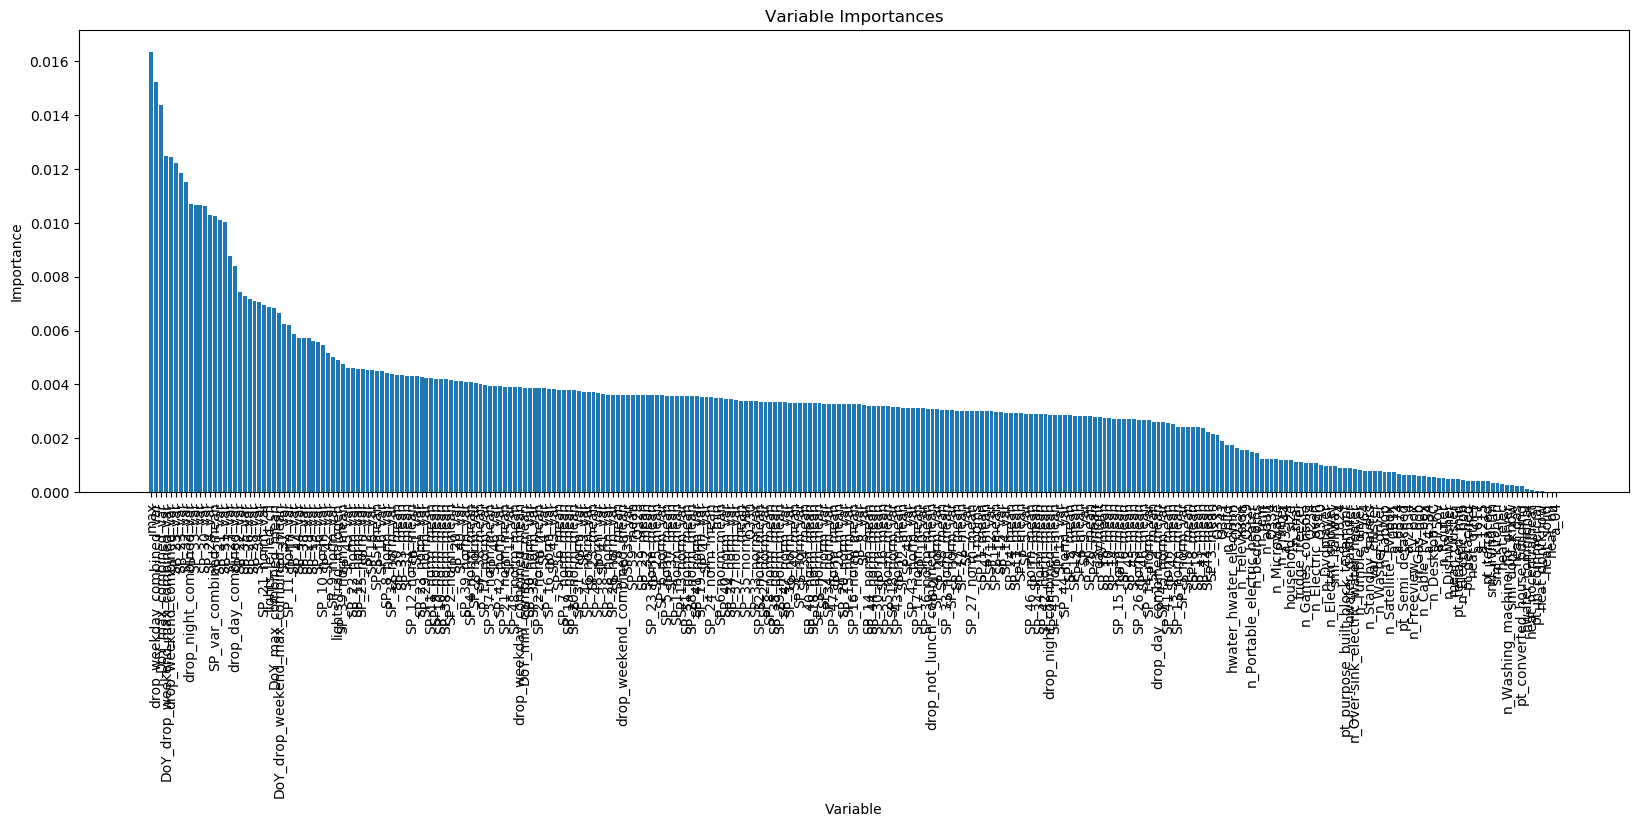

In [49]:
df_importances = create_df_importances(rf, X_cols)
plot_RF_var_importances(df_importances)

In [50]:
#df_importances
y_pred = model_fit_predict(rf, X_train_resampled, y_train_resampled, X_test)
model_dict = run_metrics_categorical(y_test, y_pred, model_dict)

## Try ordering clusters by count of high DSR households
## And also with different models for each cluster
## Or clusters as dummy variables


Classification Report:
               precision    recall  f1-score   support

 Low Response       0.84      0.87      0.85        30
High Response       0.50      0.44      0.47         9

    micro avg       0.77      0.77      0.77        39
    macro avg       0.67      0.66      0.66        39
 weighted avg       0.76      0.77      0.76        39


Confusion Matrix:
            Pred: Low  Pred:High
True: Low          26          4
True: High          5          4


In [51]:
## Setting target variable
y_col = 'high_response'
X_cols = list(df_ToU_grouped.drop(columns=[y_col, 'id']).columns)
X_cols[:10]

#X_train, X_test, y_train, y_test = format_data_4_ML(df_ToU_grouped, y_col, X_cols)

['DoY_drop_weekend_max_combined_mean',
 'DoY_drop_weekend_max_combined_var',
 'DoY_max_combined_mean',
 'DoY_max_combined_var',
 'DoY_min_combined_mean',
 'SP_10_mean',
 'SP_10_var',
 'SP_11_mean',
 'SP_11_var',
 'SP_12_mean']

In [52]:
y_pred, y_test

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

In [ ]:
df_importances

<br>

### RF Model Tuning & Feature Selection

In [ ]:
target = response_list[2]
features = ['SP_3_var', 'SP_var_combined_mean', 'SP_38_var', 'SP_22_var', 'lights_le_led_cfl', 'n_Portable_electric_heater'] + ['drop_night_combined_var', 'SP_37_mean', 'DoY_drop_weekend_max_combined_mean', 'SP_14_mean']

train_features, test_features, train_labels, test_labels = format_data_4_ML(df_ToU, target, features)
rf, df_importances = combined_RF_model(train_features, train_labels, test_features, test_labels, features)

## MAE goes down whilst MAPE and r2 go up, this model is better overall but worse for outliers

In [ ]:
## Test some new variables like total var over mean
## Factor out linear relationships or they will dominate, secondary normaly more interesting. Or run on residuals

In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)

target_arr = np.array(df_ToU[target])
features_arr = np.array(df_ToU[features])

for i in range(features_arr.shape[1]):
    feature_arr = features_arr[:, i]
    
    plt.figure()
    sns.regplot(target_arr, feature_arr, scatter_kws={'alpha':0.5})
    print(f'{features[i]} r2:{metrics.r2_score(target_arr, feature_arr)}')
    plt.title(features[i])